# Shape Analysis

In [3]:
#These libraries were used for all 3 stages of my project 
#Pandas, NumPy, and RDkit are all open source 
import pandas as pd

from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdMolAlign
from rdkit import DataStructs

import numpy as np
import seaborn as sns
import matplotlib

## Importing the ChEMBL csv files from the MMP Analysis

The SMILES from the previous MMP analysis are imported from csv.

In [4]:
egfr_all_smiles = pd.read_csv('/Users/isobelhamilton-burns/pairs_files/egfr_pairs_smiles.csv')

The imported file contains the old index, so this can just be cut out to create a new dataframe, and this can be visualised.

In [5]:
egfr_chembl_smiles = egfr_all_smiles.iloc[:,1:3]
egfr_chembl_smiles

,ChEMBL ID,smiles
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...
2,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...
3,CHEMBL1090352,c1cc(cc(c1)NC(=O)CC2CCCCC2)c3c(n4ccsc4n3)c5ccn...
4,CHEMBL1090353,c1cc(cc(c1)NC(=O)CC2CCCC2)c3c(n4ccsc4n3)c5ccnc...
...,...,...
8249,CHEMBL96627,COc1ccc2c(c1OC)c(ncn2)Nc3cccc(c3)Br
8250,CHEMBL980,COc1ccccc1OCC(CO)O
8251,CHEMBL98137,COc1ccc(cc1OC)Nc2ccnc3c2cc(c(c3)OC)OC
8252,CHEMBL98248,COc1cc2c(ccnc2cc1OC)Nc3cccc(c3)Br


A new column can be added to this dataframe with the SMILES visualised as molecules, using an inbuilt function in RDKit. The column names can then be printed, and the whole dataframe can be visualised.

In [6]:
PandasTools.AddMoleculeColumnToFrame(egfr_chembl_smiles,'smiles','Molecule',includeFingerprints=True)
print([str(x) for x in  egfr_chembl_smiles.columns])

['ChEMBL ID', 'smiles', 'Molecule']


In [7]:
egfr_chembl_smiles.head(3)

,ChEMBL ID,smiles,Molecule
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,<rdkit.Chem.rdchem.Mol object at 0x7fd89232dd60>
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...,<rdkit.Chem.rdchem.Mol object at 0x7fd89232dbe0>
2,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,<rdkit.Chem.rdchem.Mol object at 0x7fd89232de20>


Using Pandas, each molecule can be visualised. The first 12 in the dataset can be seen below.

/Users/isobelhamilton-burns/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 12. Change the maxMols value to display more.
  warnings.warn(


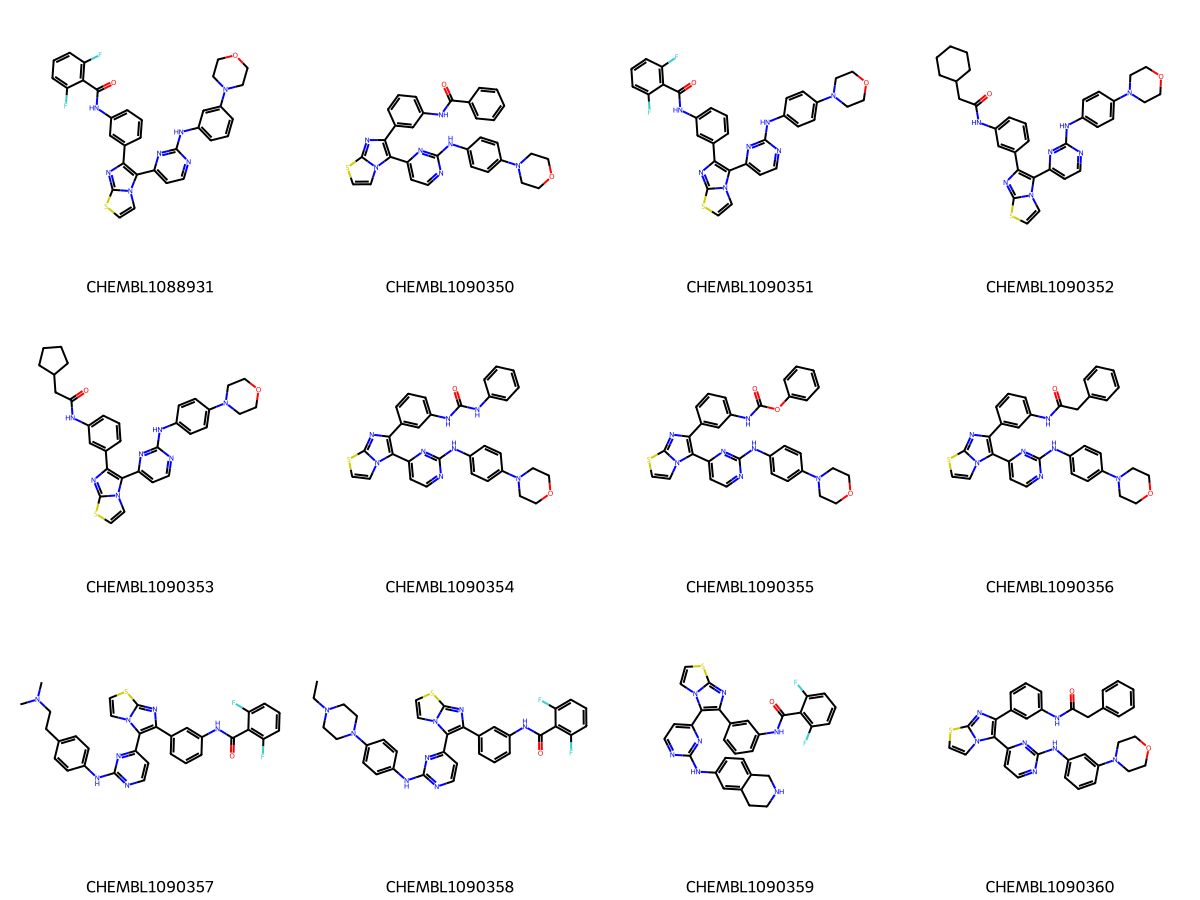

In [8]:
PandasTools.FrameToGridImage(egfr_chembl_smiles,column= 'Molecule', 
                             molsPerRow=4,subImgSize=(300,300),
                             legendsCol="ChEMBL ID", maxMols=12)

The molecules can then be converted to Morgan Fingerprints, using an RDKit function. These can be added to a new column in the dataframe. 

In [9]:
fplist = []
for mol in egfr_chembl_smiles['Molecule']:
    fp = AllChem.GetMorganFingerprintAsBitVect( mol,2 )
    fplist.append(fp)

In [10]:
egfr_chembl_smiles['mfp1']=fplist

In [11]:
egfr_chembl_smiles.head(3)

,ChEMBL ID,smiles,Molecule,mfp1
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,<rdkit.Chem.rdchem.Mol object at 0x7fd89232dd60>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...,<rdkit.Chem.rdchem.Mol object at 0x7fd89232dbe0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
2,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,<rdkit.Chem.rdchem.Mol object at 0x7fd89232de20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."


## Importing the target's structures from the PDB

The SMILES from the Protein Databank for each of the targets can then be downloaded, to compare to the SMILES from the ChEMBL database which have gone through the pairs analysis. 

How these SMILES were selected and downloaded is explored further in my project report methods section. 

In [12]:
filename = 'EGFR_CORRECTED_SMILES.txt'
egfr_pdb_text = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)
egfr_pdb_text

array(['C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1ivo_NAG_B',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1ivo_NAG_E', 'C',
       'C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1mox_BMA_F',
       'C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1mox_BMA_G',
       'C1[C@H]([C@@H]([C@@H]([C@H](C)O1)O)O)O 1mox_FUC_E',
       'C1[C@H]([C@@H]([C@@H]([C@H](C)O1)O)O)O 1mox_FUC_G',
       'C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1mox_MAN_F',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1mox_NAG_B',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1mox_NAG_E',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1mox_NAG_F',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1mox_NAG_G',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1mox_NAG_H',
       'C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1nql_BMA_C',
       'C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1nql_BMA_D',
       'C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C 1nql_NAG_A',
       'C1[C@@H]([C@H]([C@

In [13]:
egfr_pdb_combine = pd.DataFrame(egfr_pdb_text, columns = ['Smiles_and_code'])
egfr_pdb_combine

,Smiles_and_code
0,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C...
1,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C...
2,C
3,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1mox_B...
4,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 1mox_B...
...,...
888,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O 8hgs_M...
889,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C...
890,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C...
891,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C...


In [14]:
egfr_split = egfr_pdb_combine.Smiles_and_code.apply(lambda x: pd.Series(str(x).split(" ")))

In [15]:
egfr_split

,0,1
0,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,1ivo_NAG_B
1,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,1ivo_NAG_E
2,C,NaN
3,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,1mox_BMA_F
4,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,1mox_BMA_G
...,...,...
888,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,8hgs_MAN_F
889,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,8hgs_NAG_A
890,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,8hgs_NAG_B
891,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,8hgs_NAG_E


In [16]:
egfr_split = egfr_split.rename(columns={0:'Smiles', 1:'PDB_code'})

In [17]:
egfr_split

,Smiles,PDB_code
0,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,1ivo_NAG_B
1,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,1ivo_NAG_E
2,C,NaN
3,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,1mox_BMA_F
4,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,1mox_BMA_G
...,...,...
888,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,8hgs_MAN_F
889,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,8hgs_NAG_A
890,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,8hgs_NAG_B
891,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,8hgs_NAG_E


In [18]:
egfr_pdb = egfr_split[['PDB_code','Smiles']]
egfr_pdb

,PDB_code,Smiles
0,1ivo_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C
1,1ivo_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C
2,NaN,C
3,1mox_BMA_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O
4,1mox_BMA_G,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O
...,...,...
888,8hgs_MAN_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O
889,8hgs_NAG_A,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C
890,8hgs_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C
891,8hgs_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C


In [54]:
len(egfr_pdb)

893

Once the data has been formatted into a useful dataframe, the PDB data can be analysed in a similar way to the ChEMBL data above, to form fingerprints.

In [19]:
PandasTools.AddMoleculeColumnToFrame(egfr_pdb,'Smiles','Molecule',includeFingerprints=True)

[18:52:04] SMILES Parse Error: syntax error while parsing: C(
[18:52:04] SMILES Parse Error: Failed parsing SMILES 'C(' for input: 'C('
[18:52:04] SMILES Parse Error: syntax error while parsing: C(
[18:52:04] SMILES Parse Error: Failed parsing SMILES 'C(' for input: 'C('
[18:52:05] SMILES Parse Error: syntax error while parsing: C(
[18:52:05] SMILES Parse Error: Failed parsing SMILES 'C(' for input: 'C('
[18:52:05] SMILES Parse Error: extra open parentheses for input: 'C(c1ccc(C'
[18:52:05] SMILES Parse Error: extra open parentheses for input: 'C(c1ccc(C'
[18:52:05] SMILES Parse Error: extra open parentheses for input: 'C(c1ccc(C'
[18:52:05] SMILES Parse Error: extra open parentheses for input: '[C@H](C(=O)Nc1sccn1)(c1c2CCC3(CC3)n2cn1)n1cc2c(c(C)c(cc2C(F)F)C'
/Users/isobelhamilton-burns/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/PandasTools.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [20]:
egfr_pdb_full = egfr_pdb.mask(egfr_pdb.eq('None')).dropna()

In [21]:
egfr_pdb_full

,PDB_code,Smiles,Molecule
0,1ivo_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605760>
1,1ivo_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605580>
3,1mox_BMA_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd8916058e0>
4,1mox_BMA_G,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd891605880>
5,1mox_FUC_E,C1[C@H]([C@@H]([C@@H]([C@H](C)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd8915efb20>
...,...,...,...
888,8hgs_MAN_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb265e0>
889,8hgs_NAG_A,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb266a0>
890,8hgs_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb26760>
891,8hgs_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb26820>


In [22]:
fp2_list = []
for mol in egfr_pdb_full['Molecule']:
    fp2 = AllChem.GetMorganFingerprintAsBitVect( mol,2 )
    fp2_list.append(fp2)

In [23]:
egfr_pdb_full['mfp2']=fp2_list

In [24]:
egfr_pdb_full.head(3)

,PDB_code,Smiles,Molecule,mfp2
0,1ivo_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1ivo_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1mox_BMA_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd8916058e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now the same dataframe has been generated, with each of the PDB files in molecule format and also with their associated Morgan fingerprint. 

The PDB however has several different SMILES files in the same PDB code, and these need to be filtered out. This is done by adding a column calculating the length of each SMILES file, and then filtereing so only the codes with the maximum length are kept. This will remove any ligands or cofactors in the dataset. In the case of multiple maximums, these are all kept. 

In [25]:
egfr_pdb_full['smiles_length'] = egfr_pdb_full['Smiles'].apply(len)
egfr_pdb_full.head(3)

,PDB_code,Smiles,Molecule,mfp2,smiles_length
0,1ivo_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",46
1,1ivo_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",46
3,1mox_BMA_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd8916058e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",39


In [26]:
idx = egfr_pdb_full.groupby(['PDB_code'])['smiles_length'].idxmax()
idx

PDB_code
1ivo_NAG_B      0
1ivo_NAG_E      1
1mox_BMA_F      3
1mox_BMA_G      4
1mox_FUC_E      5
             ... 
8hgs_MAN_F    888
8hgs_NAG_A    889
8hgs_NAG_B    890
8hgs_NAG_E    891
8hgs_NAG_F    892
Name: smiles_length, Length: 882, dtype: int64

In [27]:
egfr_pdb_smiles = egfr_pdb_full.loc[idx][['PDB_code','Smiles','Molecule','mfp2']]

In [28]:
egfr_pdb_smiles

,PDB_code,Smiles,Molecule,mfp2
0,1ivo_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1ivo_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd891605580>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1mox_BMA_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd8916058e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1mox_BMA_G,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd891605880>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,1mox_FUC_E,C1[C@H]([C@@H]([C@@H]([C@H](C)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd8915efb20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
888,8hgs_MAN_F,C1[C@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb265e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
889,8hgs_NAG_A,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb266a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
890,8hgs_NAG_B,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb26760>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
891,8hgs_NAG_E,C1[C@@H]([C@H]([C@@H]([C@@H](CO)O1)O)O)NC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7fd88bb26820>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Finding similarities between the ChEMBL dataset and the PDB dataset 

Using the Morgan Fingerprints, the Tanimoto similarities between each ChEMBL compound and every PDB compound can be found.

In [29]:
molecule_list = egfr_chembl_smiles["mfp1"].to_list()

In [30]:
nPDBs = len(egfr_pdb_smiles)
nCHEMBL = len(egfr_chembl_smiles)
print (nPDBs, nCHEMBL)

882 8254


In [31]:
colnames = egfr_pdb_smiles["PDB_code"].to_list()

In [32]:
fingerprints2 = [x for x in egfr_pdb_smiles["mfp2"]]

In [33]:
similarities = []

for i, row in egfr_chembl_smiles.iterrows():
    fingerprint1 = row["mfp1"]
    sim = DataStructs.BulkTanimotoSimilarity(fingerprint1, fingerprints2)
    similarities.append(sim)

egfr_chembl_smiles[colnames] = similarities

/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles[colnames] = similarities
/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles[colnames] = similarities
/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles[colnames] = similarities
/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles[colnames] = similarities
/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles[colnames] = similarities
/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles[colnames] = similarities
/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/776631235.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

,ChEMBL ID,smiles,Molecule,mfp1,1ivo_NAG_B,1ivo_NAG_E,1mox_BMA_F,1mox_BMA_G,1mox_FUC_E,1mox_FUC_G,...,8hgp_NAG_D,8hgp_NAG_E,8hgs_BMA_E,8hgs_BMA_F,8hgs_MAN_E,8hgs_MAN_F,8hgs_NAG_A,8hgs_NAG_B,8hgs_NAG_E,8hgs_NAG_F
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.062500,0.062500,0.033708,0.033708,0.034483,0.034483,...,0.062500,0.062500,0.033708,0.033708,0.033708,0.033708,0.062500,0.062500,0.062500,0.062500
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.064516,0.064516,0.034884,0.034884,0.035714,0.035714,...,0.064516,0.064516,0.034884,0.034884,0.034884,0.034884,0.064516,0.064516,0.064516,0.064516
2,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.063158,0.063158,0.034091,0.034091,0.034884,0.034884,...,0.063158,0.063158,0.034091,0.034091,0.034091,0.034091,0.063158,0.063158,0.063158,0.063158
3,CHEMBL1090352,c1cc(cc(c1)NC(=O)CC2CCCCC2)c3c(n4ccsc4n3)c5ccn...,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.082474,0.082474,0.055556,0.055556,0.044944,0.044944,...,0.082474,0.082474,0.055556,0.055556,0.055556,0.055556,0.082474,0.082474,0.082474,0.082474
4,CHEMBL1090353,c1cc(cc(c1)NC(=O)CC2CCCC2)c3c(n4ccsc4n3)c5ccnc...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.083333,0.083333,0.056180,0.056180,0.045455,0.045455,...,0.083333,0.083333,0.056180,0.056180,0.056180,0.056180,0.083333,0.083333,0.083333,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,CHEMBL96627,COc1ccc2c(c1OC)c(ncn2)Nc3cccc(c3)Br,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.028986,0.028986,0.000000,0.000000,0.017241,0.017241,...,0.028986,0.028986,0.000000,0.000000,0.000000,0.000000,0.028986,0.028986,0.028986,0.028986
8250,CHEMBL980,COc1ccccc1OCC(CO)O,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.076923,0.076923,0.069767,0.069767,0.047619,0.047619,...,0.076923,0.076923,0.069767,0.069767,0.069767,0.069767,0.076923,0.076923,0.076923,0.076923
8251,CHEMBL98137,COc1ccc(cc1OC)Nc2ccnc3c2cc(c(c3)OC)OC,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.032787,0.032787,0.000000,0.000000,0.020000,0.020000,...,0.032787,0.032787,0.000000,0.000000,0.000000,0.000000,0.032787,0.032787,0.032787,0.032787
8252,CHEMBL98248,COc1cc2c(ccnc2cc1OC)Nc3cccc(c3)Br,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.030303,0.030303,0.000000,0.000000,0.018182,0.018182,...,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.030303,0.030303,0.030303,0.030303

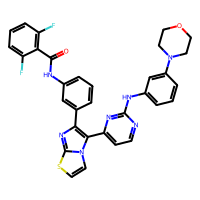
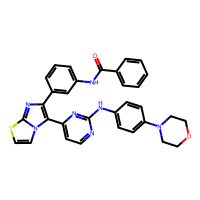
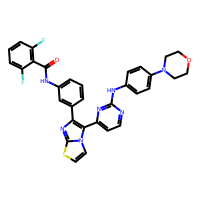
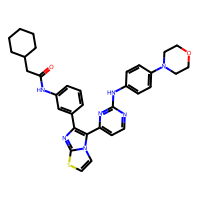
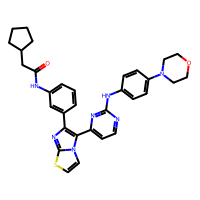
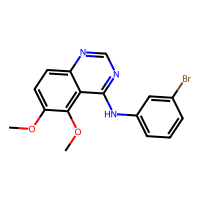
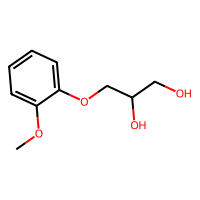
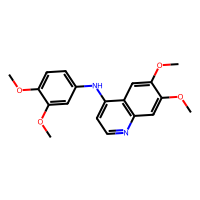
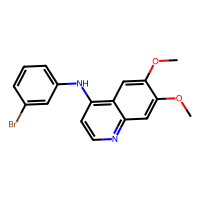
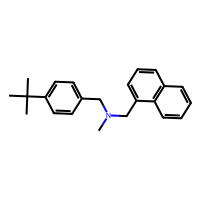

In [34]:
egfr_chembl_smiles

The highest similarity match will be the closest PDB file to the ChEMBL compound.


The highest similarity value is first found, and a column added to the dataframe. Then the PDB code associated with this match is also added to the dataframe. 

In [35]:
egfr_chembl_smiles['max_value'] = egfr_chembl_smiles.iloc[:, 6:].apply(lambda x: x.max(), axis=1)

/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/3361471243.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles['max_value'] = egfr_chembl_smiles.iloc[:, 6:].apply(lambda x: x.max(), axis=1)


In [36]:
egfr_chembl_smiles['max_column'] = egfr_chembl_smiles.iloc[:, 6:].idxmax(axis=1)

/var/folders/9j/51n5yvtx7dq9qdzff3nksz280000gn/T/ipykernel_37338/1201423704.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  egfr_chembl_smiles['max_column'] = egfr_chembl_smiles.iloc[:, 6:].idxmax(axis=1)


,ChEMBL ID,smiles,Molecule,mfp1,1ivo_NAG_B,1ivo_NAG_E,1mox_BMA_F,1mox_BMA_G,1mox_FUC_E,1mox_FUC_G,...,8hgs_BMA_E,8hgs_BMA_F,8hgs_MAN_E,8hgs_MAN_F,8hgs_NAG_A,8hgs_NAG_B,8hgs_NAG_E,8hgs_NAG_F,max_value,max_column
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.062500,0.062500,0.033708,0.033708,0.034483,0.034483,...,0.033708,0.033708,0.033708,0.033708,0.062500,0.062500,0.062500,0.062500,0.678161,3lzb_ITI_A
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.064516,0.064516,0.034884,0.034884,0.035714,0.035714,...,0.034884,0.034884,0.034884,0.034884,0.064516,0.064516,0.064516,0.064516,0.810127,3lzb_ITI_A
2,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.063158,0.063158,0.034091,0.034091,0.034884,0.034884,...,0.034091,0.034091,0.034091,0.034091,0.063158,0.063158,0.063158,0.063158,0.746988,3lzb_ITI_A
3,CHEMBL1090352,c1cc(cc(c1)NC(=O)CC2CCCCC2)c3c(n4ccsc4n3)c5ccn...,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.082474,0.082474,0.055556,0.055556,0.044944,0.044944,...,0.055556,0.055556,0.055556,0.055556,0.082474,0.082474,0.082474,0.082474,0.773810,3lzb_ITI_A
4,CHEMBL1090353,c1cc(cc(c1)NC(=O)CC2CCCC2)c3c(n4ccsc4n3)c5ccnc...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.083333,0.083333,0.056180,0.056180,0.045455,0.045455,...,0.056180,0.056180,0.056180,0.056180,0.083333,0.083333,0.083333,0.083333,0.783133,3lzb_ITI_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,CHEMBL96627,COc1ccc2c(c1OC)c(ncn2)Nc3cccc(c3)Br,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.028986,0.028986,0.000000,0.000000,0.017241,0.017241,...,0.000000,0.000000,0.000000,0.000000,0.028986,0.028986,0.028986,0.028986,0.466667,4ll0_YUN_A
8250,CHEMBL980,COc1ccccc1OCC(CO)O,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.076923,0.076923,0.069767,0.069767,0.047619,0.047619,...,0.069767,0.069767,0.069767,0.069767,0.076923,0.076923,0.076923,0.076923,0.285714,3g5v_GOL_B
8251,CHEMBL98137,COc1ccc(cc1OC)Nc2ccnc3c2cc(c(c3)OC)OC,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.032787,0.032787,0.000000,0.000000,0.020000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.032787,0.032787,0.032787,0.032787,0.362069,4i23_1C9_A
8252,CHEMBL98248,COc1cc2c(ccnc2cc1OC)Nc3cccc(c3)Br,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.030303,0.030303,0.000000,0.000000,0.018182,0.018182,...,0.000000,0.000000,0.000000,0.000000,0.030303,0.030303,0.030303,0.030303,0.349206,4ll0_YUN_A

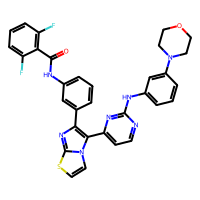
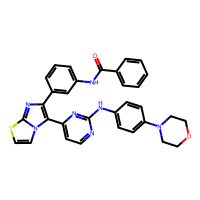
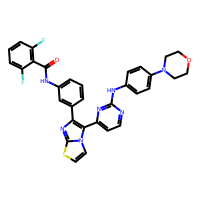
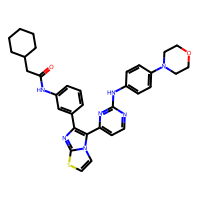
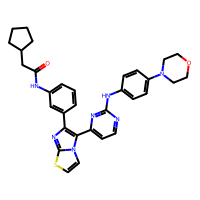
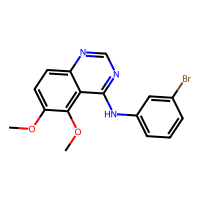
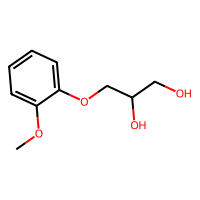
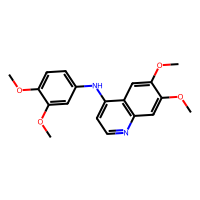
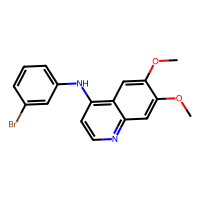
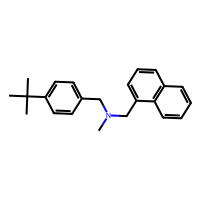

In [37]:
egfr_chembl_smiles

The max similarities and the closest match PDB files can be put into a separate dataframe for further analysis.

In [38]:
egfr_sim_results = egfr_chembl_smiles.iloc[:, [0,-2,-1]]

In [39]:
egfr_sim_results = egfr_sim_results.rename(columns={'max_value':'Similarity','max_column': 'PDB_code'})
egfr_sim_results

,ChEMBL ID,Similarity,PDB_code
0,CHEMBL1088931,0.678161,3lzb_ITI_A
1,CHEMBL1090350,0.810127,3lzb_ITI_A
2,CHEMBL1090351,0.746988,3lzb_ITI_A
3,CHEMBL1090352,0.773810,3lzb_ITI_A
4,CHEMBL1090353,0.783133,3lzb_ITI_A
...,...,...,...
8249,CHEMBL96627,0.466667,4ll0_YUN_A
8250,CHEMBL980,0.285714,3g5v_GOL_B
8251,CHEMBL98137,0.362069,4i23_1C9_A
8252,CHEMBL98248,0.349206,4ll0_YUN_A


In [40]:
egfr_sim_results.to_csv('egfr_sim_results.csv')

## Merge with the pairs analysis 

Now each compound used in the pairs analysis has been matched to its closest PDB file, each of these can be merged with the dataframes of pairs. 

The result will be tables of pairs where each member of the pair has an associated PDB code.

To do this, all of the pairs files from previous analysis are imported, and each are merged with the similarity results.

This is completed for all assay types and environment sizes.

In [44]:
egfr_sp_1_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_singleprotein1_pairs.csv')
egfr_sp_2_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_singleprotein2_pairs.csv')
egfr_sp_3_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_singleprotein3_pairs.csv')
egfr_sp_4_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_singleprotein4_pairs.csv')

egfr_p_1_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_protein_pairs1.csv')
egfr_p_2_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_protein_pairs2.csv')
egfr_p_3_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_protein_pairs3.csv')
egfr_p_4_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_protein_pairs4.csv')

egfr_af_1_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_assayformat1_pairs.csv')
egfr_af_2_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_assayformat2_pairs.csv')
egfr_af_3_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_assayformat3_pairs.csv')
egfr_af_4_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_assayformat4_pairs.csv')

egfr_cb_1_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_cellbased1_pairs.csv')
egfr_cb_2_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_cellbased2_pairs.csv')
egfr_cb_3_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_cellbased3_pairs.csv')
egfr_cb_4_pairs = pd.read_csv('/Users/isobelhamilton-burns/final_pairs_files/egfr_cellbased4_pairs.csv')

In [45]:
egfr_sp_1_pairs = egfr_sp_1_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_sp_2_pairs = egfr_sp_2_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_sp_3_pairs = egfr_sp_3_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_sp_4_pairs = egfr_sp_4_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

In [69]:
egfr_p_1_pairs = egfr_p_1_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_p_2_pairs = egfr_p_2_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_p_3_pairs = egfr_p_3_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_p_4_pairs = egfr_p_4_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

In [70]:
egfr_af_1_pairs = egfr_af_1_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_af_2_pairs = egfr_af_2_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_af_3_pairs = egfr_af_3_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_af_4_pairs = egfr_af_4_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

In [46]:
egfr_cb_1_pairs = egfr_cb_1_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_cb_2_pairs = egfr_cb_2_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_cb_3_pairs = egfr_cb_3_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

egfr_cb_4_pairs = egfr_cb_4_pairs.rename(columns={'compound_name_A_x' : 'ChEMBL_ID_A',
                                'compound_name_B_x':'ChEMBL_ID_B',
                                'compound_structure_A': 'Structure_A', 
                                'compound_structure_B': 'Structure_B', 
                                'pChEMBL Value_x': 'pChEMBL Value_A', 
                                'pChEMBL Value_y':'pChEMBL Value_B'})

In [47]:
egfr_sp_1_A = pd.merge(egfr_sp_1_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_sp_2_A = pd.merge(egfr_sp_2_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_sp_3_A = pd.merge(egfr_sp_3_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_sp_4_A = pd.merge(egfr_sp_4_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")

egfr_p_1_A = pd.merge(egfr_p_1_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_p_2_A = pd.merge(egfr_p_2_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_p_3_A = pd.merge(egfr_p_3_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_p_4_A = pd.merge(egfr_p_4_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")

egfr_af_1_A = pd.merge(egfr_af_1_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_af_2_A = pd.merge(egfr_af_2_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_af_3_A = pd.merge(egfr_af_3_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_af_4_A = pd.merge(egfr_af_4_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")

egfr_cb_1_A = pd.merge(egfr_sp_1_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_cb_2_A = pd.merge(egfr_sp_2_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_cb_3_A = pd.merge(egfr_sp_3_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")
egfr_cb_4_A = pd.merge(egfr_sp_4_pairs, egfr_sim_results, left_on="ChEMBL_ID_A", right_on="ChEMBL ID")

In [48]:
egfr_sp_1_AB = pd.merge(egfr_sp_1_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_sp_2_AB = pd.merge(egfr_sp_2_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_sp_3_AB = pd.merge(egfr_sp_3_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_sp_4_AB = pd.merge(egfr_sp_4_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")

egfr_p_1_AB = pd.merge(egfr_p_1_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_p_2_AB = pd.merge(egfr_p_2_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_p_3_AB = pd.merge(egfr_p_3_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_p_4_AB = pd.merge(egfr_p_4_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")

egfr_af_1_AB = pd.merge(egfr_af_1_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_af_2_AB = pd.merge(egfr_af_2_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_af_3_AB = pd.merge(egfr_af_3_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_af_4_AB = pd.merge(egfr_af_4_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")

egfr_cb_1_AB = pd.merge(egfr_cb_1_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_cb_2_AB = pd.merge(egfr_cb_2_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_cb_3_AB = pd.merge(egfr_cb_3_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")
egfr_cb_4_AB = pd.merge(egfr_cb_4_A, egfr_sim_results, left_on="ChEMBL_ID_B", right_on="ChEMBL ID")

In [77]:
egfr_sp_1_AB.head(3)

,Unnamed: 0,ChEMBL_ID_A,ChEMBL_ID_B,Structure_A,Structure_B,smirks,environment_size,IC50 Value_A,pIC50 Value_A,IC50 Value_B,pIC50 Value_B,delta_pIC50,ChEMBL ID_x,Similarity_x,PDB_code_x,ChEMBL ID_y,Similarity_y,PDB_code_y
0,28,CHEMBL103552,CHEMBL319620,c1ccc(c(c1)CN(Cc2cc(ccc2O)O)c3ccc(c(c3)C(=O)O)O)O,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,[c]1([H])[c]([H])[c]([H])[c]([c]([c]1([H]))[C]...,1,4100.0,5.39,2900.0,5.54,-0.15,CHEMBL103552,0.179487,5zwj_9LL_A,CHEMBL319620,0.170732,6wa2_TOV_A
1,32,CHEMBL103860,CHEMBL319620,c1cc(c(cc1CCc2cc(ccc2O)O)C(=O)O)O,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,[c:1][C]([H])([H])[C:2]([H])([H])>>[c:1][N]([H...,1,3300.0,5.48,2900.0,5.54,-0.06,CHEMBL103860,0.150000,7lgs_CIT_B,CHEMBL319620,0.170732,6wa2_TOV_A
2,17424,CHEMBL131653,CHEMBL319620,COC(=O)c1cc(ccc1O)NCc2cc(ccc2O)O,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,[C]([H])([H])([H])[O:1]>>[O:1]([H]),1,24400.0,4.61,2900.0,5.54,-0.93,CHEMBL131653,0.181818,7a2a_7G9_A,CHEMBL319620,0.170732,6wa2_TOV_A


### Single Protein

In [78]:
egfr_singleprotein1 = egfr_sp_1_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_singleprotein2 = egfr_sp_2_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_singleprotein3 = egfr_sp_3_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_singleprotein4 = egfr_sp_4_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

In [84]:
egfr_singleprotein1.head(3)

,Unnamed: 0,ChEMBL_ID_A,ChEMBL_ID_B,Structure_A,Structure_B,smirks,environment_size,IC50 Value_A,pIC50 Value_A,IC50 Value_B,pIC50 Value_B,delta_pIC50,ChEMBL ID_x,Similarity_score_A,Closest_PDB_A,ChEMBL ID_y,Similarity_score_B,Closest_PDB_B
0,28,CHEMBL103552,CHEMBL319620,c1ccc(c(c1)CN(Cc2cc(ccc2O)O)c3ccc(c(c3)C(=O)O)O)O,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,[c]1([H])[c]([H])[c]([H])[c]([c]([c]1([H]))[C]...,1,4100.0,5.39,2900.0,5.54,-0.15,CHEMBL103552,0.179487,5zwj_9LL_A,CHEMBL319620,0.170732,6wa2_TOV_A
1,32,CHEMBL103860,CHEMBL319620,c1cc(c(cc1CCc2cc(ccc2O)O)C(=O)O)O,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,[c:1][C]([H])([H])[C:2]([H])([H])>>[c:1][N]([H...,1,3300.0,5.48,2900.0,5.54,-0.06,CHEMBL103860,0.150000,7lgs_CIT_B,CHEMBL319620,0.170732,6wa2_TOV_A
2,17424,CHEMBL131653,CHEMBL319620,COC(=O)c1cc(ccc1O)NCc2cc(ccc2O)O,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,[C]([H])([H])([H])[O:1]>>[O:1]([H]),1,24400.0,4.61,2900.0,5.54,-0.93,CHEMBL131653,0.181818,7a2a_7G9_A,CHEMBL319620,0.170732,6wa2_TOV_A


In [85]:
egfr_singleprotein1_cut = egfr_singleprotein1.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_singleprotein2_cut = egfr_singleprotein2.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_singleprotein3_cut = egfr_singleprotein3.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_singleprotein4_cut = egfr_singleprotein4.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]

In [87]:
egfr_singleprotein1_final = egfr_singleprotein1[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_singleprotein2_final = egfr_singleprotein2[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_singleprotein3_final = egfr_singleprotein3[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_singleprotein4_final = egfr_singleprotein4[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]

In [89]:
egfr_singleprotein1_final.head(3)

,ChEMBL_ID_A,Structure_A,pIC50 Value_A,Similarity_score_A,Closest_PDB_A,ChEMBL_ID_B,Structure_B,pIC50 Value_B,Similarity_score_B,Closest_PDB_B,delta_pIC50
0,CHEMBL103552,c1ccc(c(c1)CN(Cc2cc(ccc2O)O)c3ccc(c(c3)C(=O)O)O)O,5.39,0.179487,5zwj_9LL_A,CHEMBL319620,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,5.54,0.170732,6wa2_TOV_A,-0.15
1,CHEMBL103860,c1cc(c(cc1CCc2cc(ccc2O)O)C(=O)O)O,5.48,0.150000,7lgs_CIT_B,CHEMBL319620,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,5.54,0.170732,6wa2_TOV_A,-0.06
2,CHEMBL131653,COC(=O)c1cc(ccc1O)NCc2cc(ccc2O)O,4.61,0.181818,7a2a_7G9_A,CHEMBL319620,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,5.54,0.170732,6wa2_TOV_A,-0.93


In [90]:
egfr_singleprotein1_final.to_csv('egfr_singleprotein1.csv')
egfr_singleprotein2_final.to_csv('egfr_singleprotein2.csv')
egfr_singleprotein3_final.to_csv('egfr_singleprotein3.csv')
egfr_singleprotein4_final.to_csv('egfr_singleprotein4.csv')

### Protein 

In [79]:
egfr_protein1 = egfr_p_1_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_protein2 = egfr_p_2_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_protein3 = egfr_p_3_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_protein4 = egfr_p_4_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

In [92]:
egfr_protein1_cut = egfr_protein1.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_protein2_cut = egfr_protein2.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_protein3_cut = egfr_protein3.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_protein4_cut = egfr_protein4.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]

In [93]:
egfr_protein1_final = egfr_protein1[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_protein2_final = egfr_protein2[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_protein3_final = egfr_protein3[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_protein4_final = egfr_protein4[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]

In [94]:
egfr_protein1_final.head(3)

,ChEMBL_ID_A,Structure_A,pIC50 Value_A,Similarity_score_A,Closest_PDB_A,ChEMBL_ID_B,Structure_B,pIC50 Value_B,Similarity_score_B,Closest_PDB_B,delta_pIC50
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,8.21,0.678161,3lzb_ITI_A,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,8.72,0.746988,3lzb_ITI_A,-0.51
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...,8.10,0.810127,3lzb_ITI_A,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,8.72,0.746988,3lzb_ITI_A,-0.62
2,CHEMBL1090352,c1cc(cc(c1)NC(=O)CC2CCCCC2)c3c(n4ccsc4n3)c5ccn...,6.06,0.773810,3lzb_ITI_A,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,8.72,0.746988,3lzb_ITI_A,-2.66


In [95]:
egfr_protein1_final.to_csv('egfr_protein1.csv')
egfr_protein2_final.to_csv('egfr_protein2.csv')
egfr_protein3_final.to_csv('egfr_protein3.csv')
egfr_protein4_final.to_csv('egfr_protein4.csv')

### Assay Format

In [96]:
egfr_assay1 = egfr_af_1_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_assay2 = egfr_af_2_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_assay3 = egfr_af_3_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_assay4 = egfr_af_4_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

In [97]:
egfr_assay1_cut = egfr_assay1.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_assay2_cut = egfr_assay2.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_assay3_cut = egfr_assay3.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_assay4_cut = egfr_assay4.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]

In [98]:
egfr_assay1_final = egfr_assay1[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_assay2_final = egfr_assay2[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_assay3_final = egfr_assay3[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_assay4_final = egfr_assay4[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]

In [99]:
egfr_assay1_final.head(3)

,ChEMBL_ID_A,Structure_A,pIC50 Value_A,Similarity_score_A,Closest_PDB_A,ChEMBL_ID_B,Structure_B,pIC50 Value_B,Similarity_score_B,Closest_PDB_B,delta_pIC50
0,CHEMBL113900,CC(C)N(CC#CC(=O)Nc1ccc2c(c1)c(c(cn2)C#N)Nc3ccc...,6.60,0.421053,4ll0_YUN_A,CHEMBL114593,COCC#CC(=O)Nc1ccc2c(c1)c(c(cn2)C#N)Nc3cccc(c3)Br,6.02,0.444444,4ll0_YUN_A,0.58
1,CHEMBL113900,CC(C)N(CC#CC(=O)Nc1ccc2c(c1)c(c(cn2)C#N)Nc3ccc...,6.60,0.421053,4ll0_YUN_A,CHEMBL114593,COCC#CC(=O)Nc1ccc2c(c1)c(c(cn2)C#N)Nc3cccc(c3)Br,6.02,0.444444,4ll0_YUN_A,0.58
2,CHEMBL115187,CCCN(CCC)CC#CC(=O)Nc1ccc2c(c1)c(c(cn2)C#N)Nc3c...,6.89,0.459459,4ll0_YUN_A,CHEMBL114593,COCC#CC(=O)Nc1ccc2c(c1)c(c(cn2)C#N)Nc3cccc(c3)Br,6.02,0.444444,4ll0_YUN_A,0.87


In [100]:
egfr_assay1_final.to_csv('egfr_assay1.csv')
egfr_assay2_final.to_csv('egfr_assay2.csv')
egfr_assay3_final.to_csv('egfr_assay3.csv')
egfr_assay4_final.to_csv('egfr_assay4.csv')

### Cell-Based

In [49]:
egfr_cell1 = egfr_cb_1_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_cell2 = egfr_cb_2_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_cell3 = egfr_cb_3_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

egfr_cell4 = egfr_cb_4_AB.rename(columns={
                                'pChEMBL Value_A': 'pIC50 Value_A', 
                                'pChEMBL Value_B':'pIC50 Value_B', 
                                'Similarity_x':'Similarity_score_A', 
                                'PDB_code_x':'Closest_PDB_A', 
                                'Similarity_y':'Similarity_score_B', 
                                'PDB_code_y':'Closest_PDB_B'})

In [50]:
egfr_cell1_cut = egfr_cell1.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_cell2_cut = egfr_cell2.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_cell3_cut = egfr_cell3.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]
egfr_cell4_cut = egfr_cell4.iloc[:,[1,2,3,4,8,10,11,13,14,16,17]]

In [51]:
egfr_cell1_final = egfr_cell1[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_cell2_final = egfr_cell2[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_cell3_final = egfr_cell3[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]
egfr_cell4_final = egfr_cell4[['ChEMBL_ID_A',
                                               'Structure_A',
                                               'pIC50 Value_A', 
                                               'Similarity_score_A', 
                                               'Closest_PDB_A', 
                                               'ChEMBL_ID_B', 
                                               'Structure_B', 
                                               'pIC50 Value_B', 
                                               'Similarity_score_B', 
                                               'Closest_PDB_B', 
                                               'delta_pIC50']]

In [52]:
egfr_cell1_final.head(3)

,ChEMBL_ID_A,Structure_A,pIC50 Value_A,Similarity_score_A,Closest_PDB_A,ChEMBL_ID_B,Structure_B,pIC50 Value_B,Similarity_score_B,Closest_PDB_B,delta_pIC50
0,CHEMBL103552,c1ccc(c(c1)CN(Cc2cc(ccc2O)O)c3ccc(c(c3)C(=O)O)O)O,5.39,0.179487,5zwj_9LL_A,CHEMBL319620,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,5.54,0.170732,6wa2_TOV_A,-0.15
1,CHEMBL103860,c1cc(c(cc1CCc2cc(ccc2O)O)C(=O)O)O,5.48,0.150000,7lgs_CIT_B,CHEMBL319620,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,5.54,0.170732,6wa2_TOV_A,-0.06
2,CHEMBL131653,COC(=O)c1cc(ccc1O)NCc2cc(ccc2O)O,4.61,0.181818,7a2a_7G9_A,CHEMBL319620,c1cc(c(cc1NCc2cc(ccc2O)O)C(=O)O)O,5.54,0.170732,6wa2_TOV_A,-0.93


In [53]:
egfr_cell1_final.to_csv('egfr_cell1.csv')
egfr_cell2_final.to_csv('egfr_cell2.csv')
egfr_cell3_final.to_csv('egfr_cell3.csv')
egfr_cell4_final.to_csv('egfr_cell4.csv')

## Generate Conformers

For the 3D analysis, conformers of each compound are found, using an RDKit function. These are then aligned to find the most appropriate. 

The first step is to add hydrogens to each of the molecule forms of the members of the pairs. This is necessary for the conformer function.

In [107]:
egfr_chembl_smiles['Molecule_add_Hs'] = egfr_chembl_smiles['Molecule'].apply(lambda mol: AllChem.AddHs(mol))

In [108]:
egfr_chembl_pdb = pd.merge(egfr_chembl_smiles, egfr_pdb_smiles, left_on="max_column", right_on='PDB_code').iloc[:,[0,1,2,-5,-7,-3,-4,-2]]

In [109]:
egfr_chembl_pdb['Molecule_add_Hs_pdb'] = egfr_chembl_pdb['Molecule_y'].apply(lambda mol: AllChem.AddHs(mol))

In [111]:
egfr_chembl_pdb.head(3)

,ChEMBL ID,smiles,Molecule_x,Molecule_add_Hs,max_value,Smiles,PDB_code,Molecule_y,Molecule_add_Hs_pdb
0,CHEMBL1088931,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,<rdkit.Chem.rdchem.Mol object at 0x7fc7a5bdb220>,<rdkit.Chem.rdchem.Mol object at 0x7fc777417520>,0.678161,c1cc(c2c(c3ccnc(n3)Nc3ccc(cc3)N3CCOCC3)n3ccsc3...,3lzb_ITI_A,<rdkit.Chem.rdchem.Mol object at 0x7fc7a5307880>,<rdkit.Chem.rdchem.Mol object at 0x7fc777f96d60>
1,CHEMBL1090350,c1ccc(cc1)C(=O)Nc2cccc(c2)c3c(n4ccsc4n3)c5ccnc...,<rdkit.Chem.rdchem.Mol object at 0x7fc7a5bdb040>,<rdkit.Chem.rdchem.Mol object at 0x7fc777417b20>,0.810127,c1cc(c2c(c3ccnc(n3)Nc3ccc(cc3)N3CCOCC3)n3ccsc3...,3lzb_ITI_A,<rdkit.Chem.rdchem.Mol object at 0x7fc7a5307880>,<rdkit.Chem.rdchem.Mol object at 0x7fc777f967c0>
2,CHEMBL1090351,c1cc(cc(c1)NC(=O)c2c(cccc2F)F)c3c(n4ccsc4n3)c5...,<rdkit.Chem.rdchem.Mol object at 0x7fc7a5bdbe80>,<rdkit.Chem.rdchem.Mol object at 0x7fc7774178e0>,0.746988,c1cc(c2c(c3ccnc(n3)Nc3ccc(cc3)N3CCOCC3)n3ccsc3...,3lzb_ITI_A,<rdkit.Chem.rdchem.Mol object at 0x7fc7a5307880>,<rdkit.Chem.rdchem.Mol object at 0x7fc777f96ee0>
